# 📊 Evaluation Script

## Download and unzip the test set

In [2]:
!gdown "1tpjuup3J9Aq93Ko1bvSL80ljfdEElqMN"

Downloading...
From: https://drive.google.com/uc?id=1tpjuup3J9Aq93Ko1bvSL80ljfdEElqMN
To: /content/train.zip
100% 5.93M/5.93M [00:00<00:00, 165MB/s]


In [3]:
%%capture
!unzip /content/train.zip

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Read test set data

In [6]:
# DO NOT TOUCH
import cv2
import numpy as np
import glob

## 1. Fill x_test and y_test:
x_test = []
y_test = []
fonts = ['Scheherazade New', 'Marhey', 'Lemonada', 'IBM Plex Sans Arabic',]

for font in fonts:
    for filename in sorted(glob.glob(f'/content/train/{font}/*.jpeg')):
        img = cv2.imread(filename, cv2.COLOR_BGR2RGB)
        x_test.append(img)
        y_test.append(fonts.index(font))

# 2. Convert them to Numpy arrays:
x_test = np.asarray(x_test)
y_test = np.asarray(y_test)

print("shape of x_data:", x_test.shape, "shape of y_data:", y_test.shape)
assert set(y_test) == {0, 1, 2, 3}

shape of x_data: (32, 1181, 1181, 3) shape of y_data: (32,)


## Let's look at some of the test images

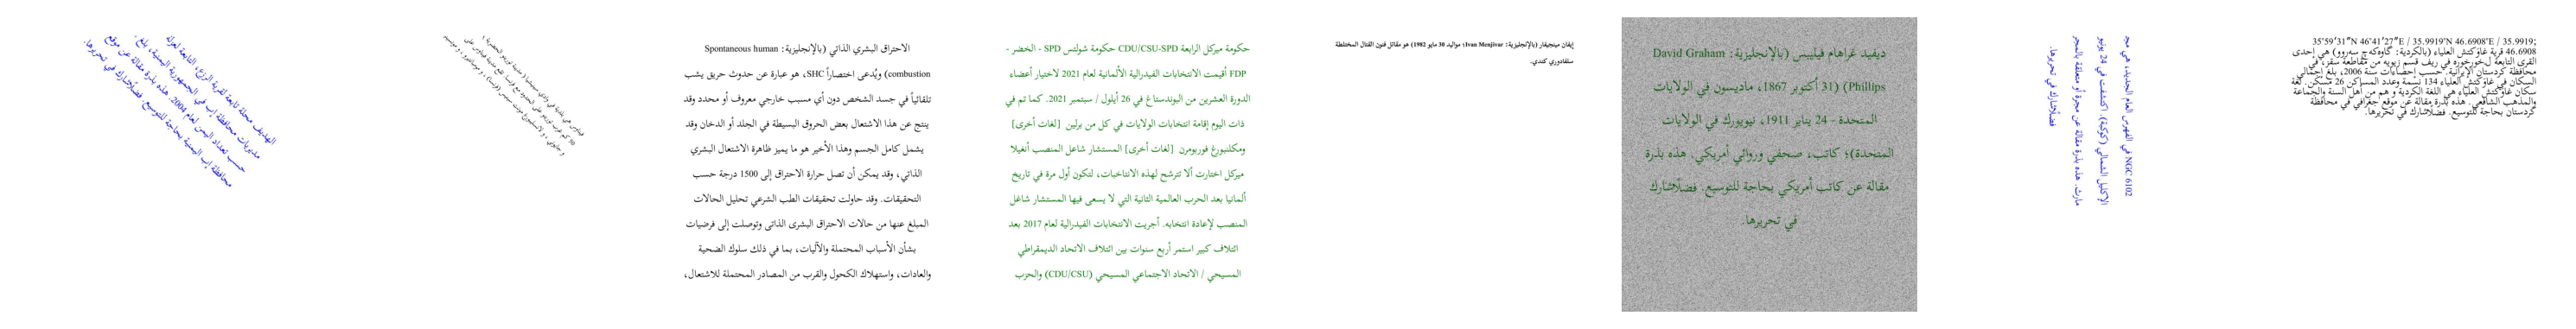

In [7]:
import matplotlib.pyplot as plt


# Create a figure and axis objects
fig, axs = plt.subplots(1, 8, figsize=(15, 10), dpi=200)

# Flatten the axis array
axs = axs.flatten()

# Plot the first 8 images
for i in range(8):
    axs[i].imshow(x_test[i])
    axs[i].axis('off')

plt.tight_layout()
plt.show()


## <font color="red"> Here you define your predict function following this specific interface: </font>

In [ ]:
path = "/content/drive/MyDrive/font-recognition-model/"

In [9]:
import sys
sys.path.append(path)

In [10]:
import pickle
import torch
from font_recognition import Preprocessing, PyTorchClassifier

In [11]:

# Load the preprocessor pipeline
with open(f"{path}preprocess_pipe.pkl", "rb") as f:
    loaded_pipeline = pickle.load(f)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator StandardScaler from version 1.3.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator PCA from version 1.3.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator Pipeline from version 1.3.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please re

In [12]:
# Intialize the preprocessor
preprocessor = Preprocessing(loaded_pipeline)

# Initilize the pytorch model
pytorch_classifier = PyTorchClassifier(2981, 512, 256, 4 , learning_rate=0.00025, epoch=50)
pytorch_classifier.load_state_dict(torch.load(f"{path}best_model.pth"))
pytorch_classifier.eval()

PyTorchClassifier(
  (model): Sequential(
    (0): Linear(in_features=2981, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=256, bias=True)
    (3): ReLU()
    (4): Linear(in_features=256, out_features=4, bias=True)
  )
)

In [13]:
'''
This function takes an RGB image of dimensions (1181, 1181, 3) from the test set and returns integer prediction ∈ {0,1,2,3}
'''
def make_prediction(x):
    # DEFINE YOUR FUNCTION HERE AND DO NOT CHANGE ANYTHING ELSE IN THE NOTEBOOK
    # Make grayscale
    x = cv2.cvtColor(x, cv2.COLOR_RGB2GRAY)
    x_features = preprocessor.preprocess_test_data(x)
    pred = pytorch_classifier.predict(x_features)
    return pred[0]

# Fill your team number here
TEAM_NUM = "4"

## Now let's compute the accuracy of the model:

In [14]:
### DO NOT TOUCH

import time

start_time = time.time()

y_pred = []
for x in x_test:
    assert x.shape == (1181, 1181, 3)
    ŷ = make_prediction(x)
    y_pred.append(ŷ)

end_time = time.time()
avg_execution_time = (end_time - start_time) / len(x_test) * 1000

y_pred = np.asarray(y_pred)
accuracy = np.mean(y_pred == y_test)

print(f"Team {TEAM_NUM} got accuracy: {accuracy:.2%}")
print(f"Execution time: {avg_execution_time:.2f} milliseconds")
### DO NOT TOUCH

100%|██████████| 1/1 [00:00<00:00,  1.36it/s]


Team 4 got accuracy: 93.75%
Execution time: 1457.87 milliseconds


In [15]:
y_pred.T

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 3, 3, 3, 3, 3, 3, 3, 3])

In [16]:
y_test.T

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 3, 3, 3, 3, 3, 3, 3, 3])